<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$ 

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.


## Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

- 
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1} 
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función 
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página 
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def expo(x,N): # esta funcion acepta un numero para x y otro para N que es el numero de sumas que se hacen dentro de la sumatoria
  
  n= np.arange(0,N).astype(int) #Genera un vector con el numero de potencias que se van a usar en la serie en funcion de N
  S= ((-1)**n)# Genero el vector que alterna los signos
  pot_x= x**n # saco las potencias para los diferentes n
  fac_= []#Genero una lista vacia
  for i in range(0,len(n)): #Saco el factorial para cada numero entre cero y el numero de n
    fact= np.math.factorial(i)
    fac_.append(fact)# agrego el resultado a la lista vacia

  v_arra = np.array(fac_) #lo transformo en un vector
  suma = ((S*pot_x)/(v_arra)).sum() #hago la sumatoria
  return suma


In [ ]:
expo(2,13)


0.13533643311421095

In [ ]:
e= np.exp(-2)
e

0.1353352832366127

In [ ]:
def presi_exp(x): # esta funcion saca los valores de N para los cuales la presicion es de almenos 1E(-7) comparada con la funcion np.exp(x)
  N=0
  while True: # estra al ciclo

    A= abs((-x)**N+1)/abs(np.math.factorial(N+1))# a la variable A se le cuarda la operacion de la formula
    B= abs((10**-7)*expo(x,N)) # a la variable B guarda el producto de mi funcion por el error sugerido
    if A <= B:# hago la desigualdad si se cumple rompe el siclo
      break
    else:  #sino entonces a lo que hay en N sumarle 1
      N += 1
  return N
   
presi_exp(-2)

12

In [ ]:
print(expo(3,23)) # se calcula con la serie y con la funcion de numpy la misma exponencial y se muestra
a= np.exp(-3)
a
error= expo(3,15)-np.exp(-3)
error

0.049787068371099356


9.226297292365404e-06

In [ ]:

x= np.linspace(0,10,100)
lista = [expo(i,presi_exp(i))for i in x ]
lista



[1.0,
 0.9039239022952824,
 0.8170784211407007,
 0.7385767149170471,
 0.6676171462630145,
 0.6034750958327012,
 0.5454955620744008,
 0.4930864706482456,
 0.4457126235588303,
 0.4028902234428212,
 0.3641849293380613,
 0.32919306083311084,
 0.29756559884722844,
 0.2689764369203202,
 0.24313415516517864,
 0.21977491521746587,
 0.19865984379270016,
 0.1795734758132057,
 0.16232056707549528,
 0.14672538682741812,
 0.13262869455266868,
 0.11988627720652857,
 0.10836812998998556,
 0.09795641617436956,
 0.08854511384372143,
 0.08003798491045822,
 0.07234838338544955,
 0.06539746555192333,
 0.05911425771243999,
 0.05343477288033575,
 0.04830093676474081,
 0.043660446346680225,
 0.039465738101044284,
 0.035674053912332505,
 0.032246556887423734,
 0.02914841746055923,
 0.026347990787945398,
 0.023816587295956267,
 0.021528397360765505,
 0.019459995572996738,
 0.017590347170641844,
 0.015900321798852767,
 0.014372715594041166,
 0.01299184839283612,
 0.011743623632411276,
 0.01061533821688367,
 0.0

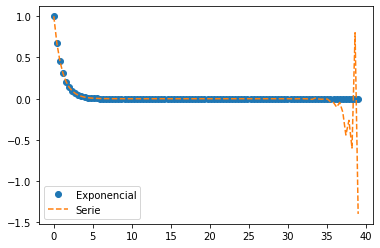

In [ ]:

x= np.linspace(0,39,100) # A medida que voy metiendo numeros grandes para obtener numeros pequeños comienza a diverger.
plt.plot(x,np.exp(-x),"o",label= "Exponencial")# Diverge para x cercanos a 39
plt.plot(x,[expo(i,presi_exp(i))for i in x ],"--",label= "Serie")
plt.legend()



In [ ]:
x= 9.99 #Pero para valores con las condiciones puestas en el ejercicio las cosas cambian
n= x-1
expo(x,n)

1331.2538248116216

In [ ]:
b= 1/np.exp(x) # se obtienen valores diferentes 
b

4.585620664220731e-05

In [ ]:
diff= b-expo(x,n) # el numero de sumas debe ser mayor para acercarnos un poco al valor deseado
diff

-1331.2537789554149

In [ ]:
n= presi_exp(x) #vemos que usando el codigo del error se aproxima más al valor deseado
expo(x,n)


4.585633562396293e-05

In [ ]:
diff= expo(x,n)-b # El error se reduce sustancialmente
diff

1.289817556213613e-10

Text(0, 0.5, 'Error')

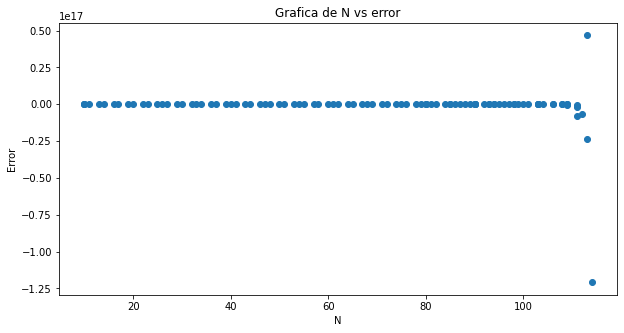

In [ ]:
x= np.linspace(0,39,100)
Ns=[presi_exp(i)for i in x] # N necesarios para 100 valores de x en el intervalo(0,39)
N_vector= np.array(Ns)        #la lista en array
npexp= [np.exp(-i) for i in x]   #saco la lista de los diferentes valores de x evaluados en el mismo intervalo
serien=[expo(i,presi_exp(i)) for i in x] # evaluo los mismos valores para la serie
error = (np.array(serien)-np.array(npexp))/ np.array(np.array(npexp))  #convierto las listas en arrays y los resto para saber la difernecia
# Grafico
plt.figure(figsize=(10,5))
plt.plot(N_vector,error,"o")
plt.title("Grafica de N vs error")
plt.xlabel("N")
plt.ylabel("Error")


## Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

- 
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1} 
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función 
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página 
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

In [ ]:
def serie1(N):
  n= np.arange(1,2*N+1)
  S1= ((((-1)**n)*n)/(n+1)).sum()
  return S1
serie1(100000)

0.3068503194587304

In [ ]:
def serie2(N):
  n=np.arange(1,N+1)
  A= (-1)*((((2*n)-1)/(2*n)).sum())
  B= ((2*n)/((2*n)+1)).sum()
  S2= A+B
  return S2
serie2(100000)

0.3068503194517689

In [ ]:
def serie3(N):
  n= np.arange(1,N+1)

  serie3=(1/((2*n)*((2*n)+1))).sum()

  return serie3

serie3(100000)

0.30685031945880453

In [ ]:
def Error1(N):
  Error= (serie1(N)-serie3(N))/(serie3(N))
  return Error

def Error2(N):
  Error= (serie2(N)-serie3(N))/(serie3(N))
  return Error

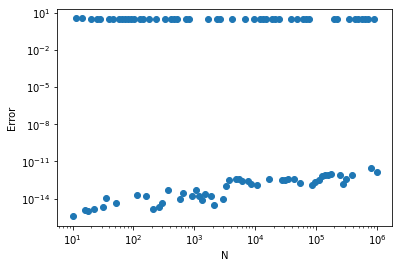

In [ ]:
N= np.logspace(1,6,100)
y1 = [Error1(i)for i in N]
y1_= np.array(y1)
y1_abs= np.abs(y1_)

fig, ax = plt.subplots()
ax.loglog(N, y1_abs,'o')
ax.set_xlabel('N')
ax.set_ylabel('Error')
plt.show()

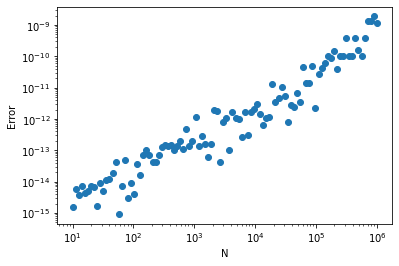

In [ ]:
N= np.logspace(1,6,100)
y2 = [Error2(i)for i in N]
y2_= np.array(y2)
y2_abs= np.abs(y2_)
#y2_abs

fig, ax = plt.subplots()
ax.loglog(N, y2_abs,'o')
ax.set_xlabel('N')
ax.set_ylabel('Error')
plt.show()